# Week 6 assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import pandas as pd

In [2]:
dihedrals = np.loadtxt('./COLVAR', skiprows = 5)
time = dihedrals[:,0]
phi1 = dihedrals[:,1]
psi1 = dihedrals[:,2]

In [3]:
print(time)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]


In [4]:
print(phi1)

[1.157159 1.057037 0.692652 ... 1.250587 1.152444 1.294967]


In [5]:
print(psi1)

[ 0.131158 -0.517175 -1.702588 ... -0.479439 -0.890501 -1.379884]


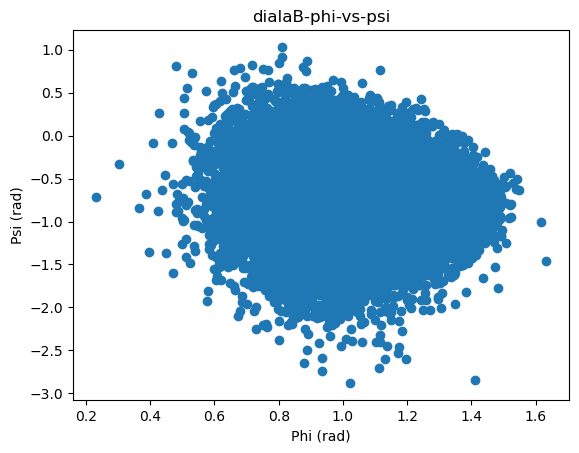

In [6]:
plt.scatter(phi1, psi1, marker = 'o')
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('dialaB-phi-vs-psi')
plt.savefig('../../../figures/dialaB-phi-vs-psi.png')
plt.show()

In [7]:
traj = md.load_xtc('./traj_comp.xtc', top='./confout.gro')
print(traj)

<mdtraj.Trajectory with 100001 frames, 22 atoms, 3 residues, and unitcells>


In [8]:
phi2 = md.compute_phi(traj, periodic=True)
psi2 = md.compute_psi(traj, periodic=True)
phi2_ = md.compute_phi(traj)[1]
psi2_ = md.compute_psi(traj)[1]

0.23008762300014496
1.6334284543991089


/state/partition1/job-27479522/ipykernel_2394162/3817287987.py:6: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


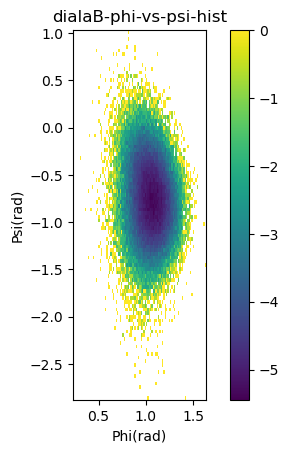

In [9]:
# compute a 2D histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi2[1].flatten(), psi2[1].flatten(), bins = 100)
print(xedges[0])
print(xedges[-1])
H = np.transpose(H)
H = -np.log(H)
plt.imshow(H, interpolation = 'nearest', origin = 'lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi(rad)')
plt.ylabel('Psi(rad)')
plt.title('dialaB-phi-vs-psi-hist')
plt.savefig('../../../figures/dialaB-phi-vs-psi-hist.png')
plt.colorbar()

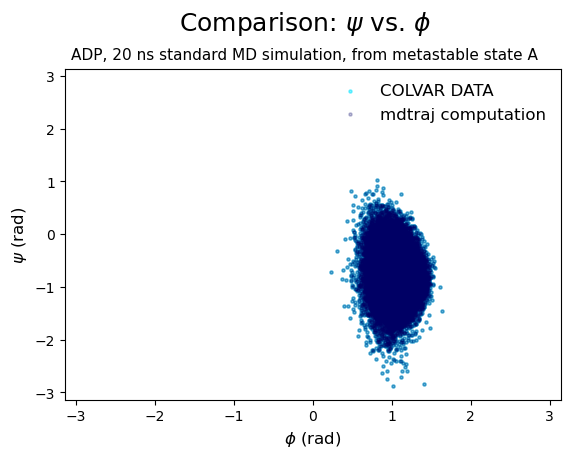

In [16]:
# figure 1 - plot phi_vs_psi, compare xtc_A and colvar_A
fig=plt.figure(1)

# load phi and psi from colvar_A
phi1 = dihedrals[:,1]
psi1 = dihedrals[:,2]
# load phi and psi from xtc_A
phi2_ = md.compute_phi(traj)[1]
psi2_ = md.compute_psi(traj)[1]

# settings for the scatter plot
# colorblind-friendly color, the overlap is also colorblind-friendly
color1 = '#00e4ff'
color2 = '#000065'
# alpha setting
alpha1 = 0.5
alpha2 = 0.25
# marker setting
marker1 = 'o'
marker2 = 'o'
# size setting
size1 = 5
size2 = 5
# plot every Nth frame
N=1

# plot phi_vs_psi from colvar_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi1[::N], psi1[::N], color=color1, alpha=alpha1, marker=marker1, s=size1, label='COLVAR DATA')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper right', fontsize=12, frameon=False)
# plot phi_vs_psi from xtc_A, scatter plot, colorblind friendly, y is psi, x is phi
plt.scatter(phi2_[::N], psi2_[::N], color=color2, alpha=alpha2, marker=marker2, s=size2, label='mdtraj computation')
# plot legend, righttop, fontsize 12
plt.legend(loc='upper right', fontsize=12, frameon=False)

# set axis range
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

# labels, unit rad, fontsize 12
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)

# two lines of title
plt.text(x=0.5, y=0.88, s="Comparison: "r"$\psi$"" vs. ""$\phi$", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 20 ns standard MD simulation, from metastable state A", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
plt.savefig('../../../figures/dialab-phi-vs-psi-colvar-md-compare.png', format='pdf', dpi=300, bbox_inches='tight')

## Calculation of Standard deviation of phi and psi

In [11]:
len_phi1 = len(phi1)
len_psi1 = len(psi1)
print(len_phi1)
print(len_psi1)

100001
100001


In [12]:
print(max(phi1))
print(max(psi1))

1.633427
1.031563


In [13]:
phi1_av = sum(phi1)/len(phi1)
psi1_av = sum(psi1)/len(psi1)
print(phi1_av)
print(psi1_av)

1.0497246567534362
-0.753824822251776


In [14]:
phi1_std = (sum((e - phi1_av)**2 for e in phi1) / len_phi1)**0.5
psi1_std = (sum((e - psi1_av)**2 for e in psi1) / len_psi1)**0.5

In [15]:
print("Standard Deviation for phi", phi1_std)
print("Standard Deviation for psi", psi1_std)

Standard Deviation for phi 0.1323817662350665
Standard Deviation for psi 0.34453442436874365
